In [213]:
import pandas as pd 
import numpy as np 


In [214]:
flooding_ct_dataset = pd.read_csv('../flooding_ct_dataset.csv')

In [215]:
p_at_least_1_estimate = pd.read_csv("/share/ju/matt/street-flooding/runs/icar_cheating/simulated_False/ahl_True/20241021-1227/estimate_at_least_one_positive_image_by_area.csv")
p_at_least_1_estimate['tract_id'] = p_at_least_1_estimate['tract_id'].astype(int)

In [216]:
p_y_estimate = pd.read_csv("/share/ju/matt/street-flooding/runs/icar_cheating/simulated_False/ahl_True/20241021-1227/estimate_p_y.csv")
p_y_estimate['tract_id'] = p_y_estimate['tract_id'].astype(int)

In [217]:
flooding_ct_dataset = flooding_ct_dataset.merge(p_at_least_1_estimate, left_on='GEOID', right_on='tract_id', how='left')

In [218]:
flooding_ct_dataset = flooding_ct_dataset.merge(p_y_estimate, left_on='GEOID', right_on='tract_id', how='left', suffixes=('_at_least_1', '_y'))

In [219]:
(flooding_ct_dataset['n_total'] == flooding_ct_dataset['n_images_by_area_y']).all()

True

In [220]:
flooding_ct_dataset['at_least_one_positive_image_by_area']

0       0.000000
1       0.533312
2       1.000000
3       0.338725
4       0.749423
          ...   
2322    0.176005
2323    0.393641
2324    0.897933
2325    0.458751
2326    0.262203
Name: at_least_one_positive_image_by_area, Length: 2327, dtype: float64

In [221]:
(flooding_ct_dataset['n_classified_positive'] > 0).value_counts()

n_classified_positive
False    1846
True      481
Name: count, dtype: int64

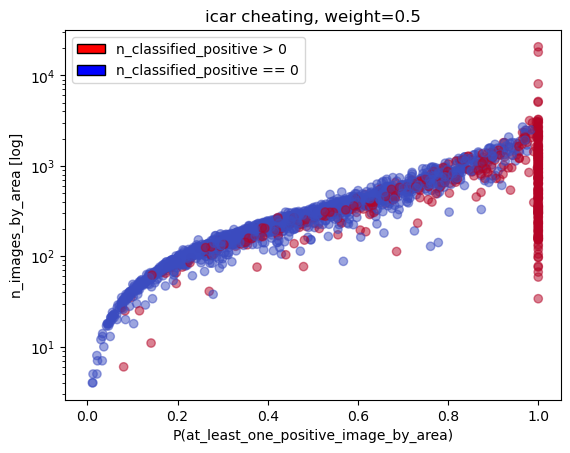

In [222]:
# scatterplot of at_least_one_positive_image_by_area vs. n_images_by_area
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(flooding_ct_dataset['at_least_one_positive_image_by_area'], flooding_ct_dataset['n_images_by_area_y'], c=flooding_ct_dataset['n_classified_positive'] > 0, cmap='coolwarm', alpha=0.5)

# log y scale 
ax.set_yscale('log')

ax.set_xlabel('P(at_least_one_positive_image_by_area)')
ax.set_ylabel('n_images_by_area [log]')

ax.set_title('icar cheating, weight=0.5')

# custom legend patches 
from matplotlib.patches import Patch

legend_elements = [Patch(facecolor='red', edgecolor='black', label='n_classified_positive > 0'),
                     Patch(facecolor='blue', edgecolor='black', label='n_classified_positive == 0')]

ax.legend(handles=legend_elements)

plt.savefig('icar_cheating_at_least_one_positive_image_by_area_vs_n_images_by_area_colored_classified_positive.pdf')



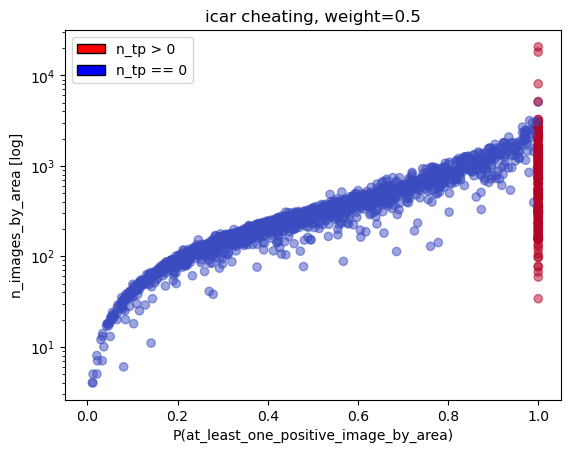

In [223]:
# repeat the above plot, but color by n_tp 
fig, ax = plt.subplots()

ax.scatter(flooding_ct_dataset['at_least_one_positive_image_by_area'], flooding_ct_dataset['n_images_by_area_y'], c=flooding_ct_dataset['n_tp'] > 0, cmap='coolwarm', alpha=0.5)

# log y scale
ax.set_yscale('log')

ax.set_xlabel('P(at_least_one_positive_image_by_area)')
ax.set_ylabel('n_images_by_area [log]')

ax.set_title('icar cheating, weight=0.5')

# custom legend patches
from matplotlib.patches import Patch

legend_elements = [Patch(facecolor='red', edgecolor='black', label='n_tp > 0'),
                     Patch(facecolor='blue', edgecolor='black', label='n_tp == 0')]
ax.legend(handles=legend_elements)

plt.savefig('icar_cheating_at_least_one_positive_image_by_area_vs_n_images_by_area_colored_tp.png')

In [224]:
flooding_ct_dataset.columns

Index(['CTLabel', 'BoroCode', 'BoroName', 'CT2020', 'BoroCT2020', 'CDEligibil',
       'NTAName', 'NTA2020', 'CDTA2020', 'CDTANAME', 'GEOID', 'PUMA',
       'Shape_Leng', 'Shape_Area', 'geometry', 'n_total',
       'n_classified_positive', 'n_tp', 'n_fp', 'n_tn', 'n_fn',
       'total_not_annotated', 'positives_not_annotated',
       'negatives_not_annotated', 'tract_id_at_least_1',
       'empirical_estimate_at_least_1', 'at_least_one_positive_image_by_area',
       'at_least_one_positive_image_by_area_CI_lower',
       'at_least_one_positive_image_by_area_CI_upper',
       'n_images_by_area_at_least_1', 'tract_id_y', 'empirical_estimate_y',
       'p_y', 'p_y_CI_lower', 'p_y_CI_upper', 'n_images_by_area_y'],
      dtype='object')

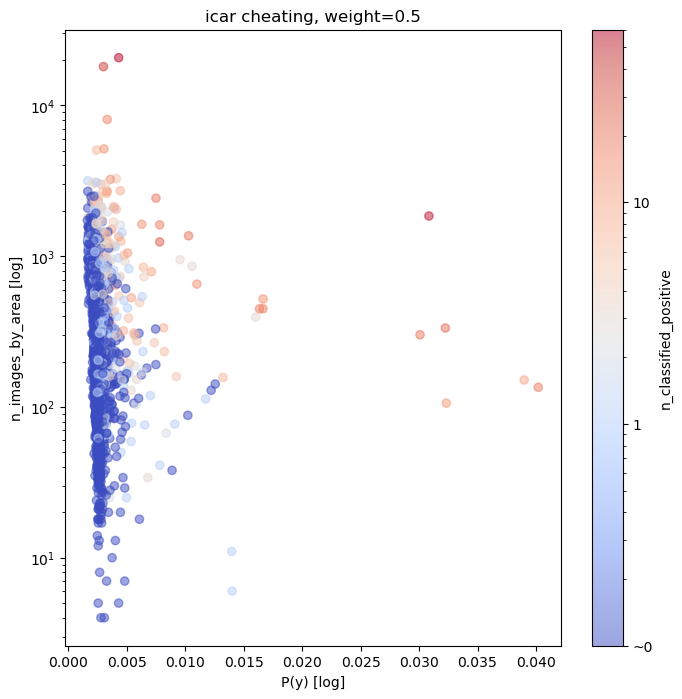

In [229]:
# p_y, n_classified_positive verison of plot 
fig, ax = plt.subplots(figsize=(8,8))

# lognorm
from matplotlib.colors import LogNorm
norm = LogNorm()

ax.scatter(flooding_ct_dataset['p_y'], flooding_ct_dataset['n_images_by_area_y'], c=flooding_ct_dataset['n_classified_positive']+0.1, cmap='coolwarm', norm=norm, alpha=0.5)

# log y scale
ax.set_yscale('log')

# log x scale
#ax.set_xscale('log')

ax.set_xlabel('P(y) [log]')
ax.set_ylabel('n_images_by_area [log]')

ax.set_title('icar cheating, weight=0.5')

# add colorbar 
cbar = plt.colorbar(ax.collections[0], ax=ax, label='n_classified_positive')

# Define new ticks and replace the lowest tick with a custom value
ticks = [0.1, 1, 10]  # Define your desired ticks
cbar.set_ticks(ticks)

# Set custom tick labels
cbar.set_ticklabels(['~0', '1', '10'])

plt.savefig('icar_cheating_p_y_vs_n_images_by_area_colored_classified_positive.pdf')



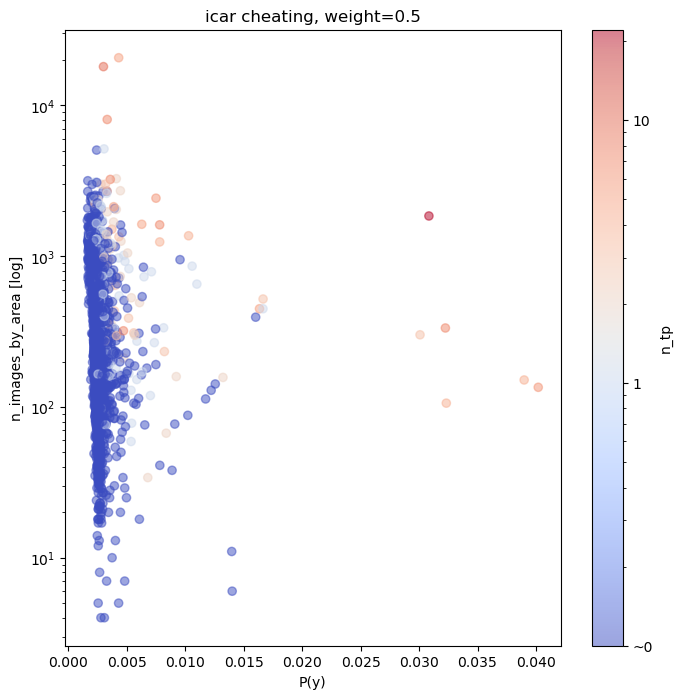

In [228]:
# p_y, n_tp version of plot

fig, ax = plt.subplots(figsize=(8,8))

norm = LogNorm()

ax.scatter(flooding_ct_dataset['p_y'], flooding_ct_dataset['n_images_by_area_y'], c=flooding_ct_dataset['n_tp']+0.1, cmap='coolwarm', norm=norm, alpha=0.5)

# log y scale
ax.set_yscale('log')

# log x scale
#ax.set_xscale('log')

ax.set_xlabel('P(y)')
ax.set_ylabel('n_images_by_area [log]')

ax.set_title('icar cheating, weight=0.5')



# colorbar 
cbar = plt.colorbar(ax.collections[0], ax=ax, label='n_tp')

# Define new ticks and replace the lowest tick with a custom value
ticks = [0.1, 1, 10]  # Define your desired ticks
cbar.set_ticks(ticks)

# Set custom tick labels
cbar.set_ticklabels(['~0', '1', '10'])


plt.savefig('icar_cheating_p_y_vs_n_images_by_area_colored_tp.pdf')

